In [1]:
import numpy as np

class LRegressionClassifier(object):
    def __init__(self, learning_rate=0.001, n_iter=500):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
    
    def sigmoid(self, inX):
        return 1.0 / (1 + np.exp(-inX))

    def fit(self, inX, y):
        self.dataMatrix = np.mat(inX)                  # 转换为矩阵格式
        self.classLabels = np.mat(y).transpose()
        m,n = np.shape(self.dataMatrix)
        
        self.weights = np.ones((n, 1))                 # 初始化权重weights全为1，
        
        self.weights = self.gradient_Desent()                              # 调用梯度上升，优化参数
        
        return self.weights
        
    def predict(self, inX):
        return np.where(self.net_input(inX)>=0.5, 1, 0)
    
    def net_input(self, inX):
        return self.sigmoid(np.dot(inX, self.weights))
    
    def gradient_Desent(self, ):
        for k in range(self.n_iter):
            y_pred = self.net_input(self.dataMatrix)
            #y_pred = self.predict(self.dataMatrix)
            self.weights = self.weights + self.learning_rate *  self.dataMatrix.transpose() * (self.classLabels - y_pred) 
        return self.weights

In [2]:
filename='testSet.txt' #文件目录
def loadDataSet():   #读取数据（这里只有两个特征）
    dataMat = []
    labelMat = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])   #前面的1，表示方程的常量。比如两个特征X1,X2，共需要三个参数，W1+W2*X1+W3*X2
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [68]:
X,y = loadDataSet()

In [70]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [87]:
len(x_train), len(x_test), len(y_train), len(y_test)

(80, 20, 80, 20)

In [ ]:
len()

In [109]:
clf = LRegressionClassifier()

In [110]:
weights = clf.fit(x_train, y_train)

In [111]:
weights.shape

(3, 1)

In [112]:
weights

matrix([[ 3.83425068],
        [ 0.35506939],
        [-0.56834448]])

In [64]:
weights = weights.getA()

In [113]:
y_pred = clf.predict(x_test)

In [114]:
x_test

[[1.0, -1.510047, 6.061992],
 [1.0, -1.099458, 1.688274],
 [1.0, -1.347803, -2.406051],
 [1.0, -1.076637, -3.181888],
 [1.0, 0.126117, 0.922311],
 [1.0, -0.036453, 2.690988],
 [1.0, 0.470575, 9.332488],
 [1.0, 1.821096, 10.28399],
 [1.0, -0.783277, 11.009725],
 [1.0, -0.810823, -1.466018],
 [1.0, 0.197445, 9.744638],
 [1.0, -1.185247, 11.309318],
 [1.0, -0.344008, 10.717485],
 [1.0, -0.397822, 8.058397],
 [1.0, -0.355715, 10.325976],
 [1.0, 1.224863, 11.58736],
 [1.0, 0.556921, 8.294984],
 [1.0, 0.828534, 2.676045],
 [1.0, 2.056216, 5.019981],
 [1.0, 0.850433, 6.920334]]

In [115]:
len(y_pred)

20

In [116]:
100 * np.mean(y_pred == y_test)

50.0

In [119]:
count = 0
for i in range(len(y_pred)):
    if(y_pred[i] == y_test[i]):
        count += 1
count /= len(y_pred)
print(count)

0.95


In [117]:
y_pred, y_test

(array([[0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1]]), [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [65]:
from numpy import *
def plotBestFit(weights):  #画出最终分类的图
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

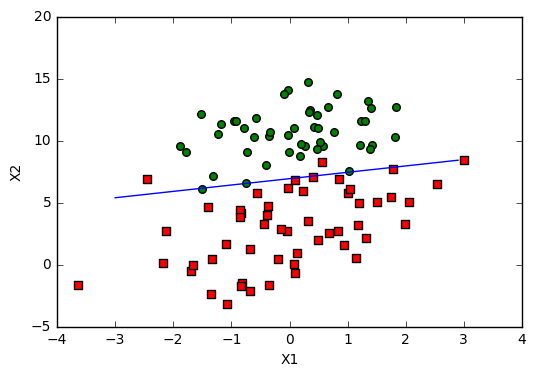

In [67]:
plotBestFit(weights)